# IFN645 Case Study 2
## Mining from Manufacturing, Supermarket, News Stories and Web Log Data

### Contents
1. [Clustering & Pre-processing](#clust)
2. [Association Mining](#association)
3. [Text Mining](#text)
4. [Web Mining](#web)

---
## Part 1: Clustering Pre-processing and K-means analysis<a name="clust"></a>
### 1. Can you identify data quality issues in this dataset such as unusual data types, missing values, etc?
In the process of importing the data, the dataframe.info() method can be used to evaluate the dataset.

In [1]:
import pandas as pd
import numpy as np
# Import Data from csv without skipping empty cells
df = pd.read_csv('Casestudy2-Data-Py/model_car_sales.csv', na_filter=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 8 columns):
LOCATION_NUMBER    675 non-null int64
REPORT_DATE        675 non-null object
DEALER_CODE        675 non-null object
UTE                675 non-null object
HATCH              675 non-null object
WAG0N              675 non-null object
SEDAN              675 non-null object
K__SALES_TOT       675 non-null object
dtypes: int64(1), object(7)
memory usage: 42.3+ KB


From the `info()` output, we can identify the following issues

#### Unusual Datatypes
<table>
<tr>
<th>Variable Name</th>
<th>Current Datatype</th>
<th>Desired Datatype</th>
</tr>
<tr>
<td>HATCH</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>SEDAN</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>WAGON</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>UTE</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>K_SALES_TOT </td>
<td>Object</td>
<td>int64</td>
</tr>
</table>
     
For the given data description, the fields `UTE`, `HATCH`,`SEDAN`, `WAG0N` and `K_SALES_TOT` should be interval/numerical values as opposed to objects.
By using the `.describe()` function, we may be able to uncover the source of the issues in the dataset

In [2]:
# print details for all variables in dataframe
for cols in df:
    print(df[cols].describe())
    print("-"*20)

count    675.0
mean     338.0
std      195.0
min        1.0
25%      169.5
50%      338.0
75%      506.5
max      675.0
Name: LOCATION_NUMBER, dtype: float64
--------------------
count            675
unique             1
top       2013-04-30
freq             675
Name: REPORT_DATE, dtype: object
--------------------
count          675
unique         675
top       Euro-401
freq             1
Name: DEALER_CODE, dtype: object
--------------------
count     675
unique    143
top          
freq       22
Name: UTE, dtype: object
--------------------
count     675
unique    518
top          
freq       22
Name: HATCH, dtype: object
--------------------
count     675
unique    426
top          
freq       22
Name: WAG0N, dtype: object
--------------------
count     675
unique    501
top          
freq       22
Name: SEDAN, dtype: object
--------------------
count     675
unique    109
top       932
freq       25
Name: K__SALES_TOT, dtype: object
--------------------


Analysis of the `.describe()` output show a number of unusual results which may explain the cause of the unusual data types.

For this output, `top` describes the most commonly occuring value in the dataset. For the fields `UTE`, `HATCH`, `WAG0N` and `SEDAN`, that value appears to be an empty string.

The output of the `value_counts()` function (see below) allow us to identify this as the root cause of our data abnormalities.

In [3]:
# Check for cause of issues in one of the variables
print(df['UTE'].value_counts())

       22
81     15
92     15
90     12
80     12
72     11
100    11
106    11
83     10
84     10
97     10
91      9
82      9
88      9
99      9
77      9
70      9
93      9
68      9
75      9
73      9
69      9
116     9
114     8
66      8
85      8
78      8
74      8
89      8
98      8
       ..
41      1
190     1
150     1
202     1
197     1
142     1
196     1
31      1
146     1
23      1
157     1
52      1
155     1
40      1
37      1
180     1
131     1
166     1
206     1
8       1
191     1
46      1
178     1
143     1
198     1
209     1
173     1
39      1
9       1
153     1
Name: UTE, Length: 143, dtype: int64


Additionally, we can isolate the rows containing the empty string in order to determine if there is a link between the missing variables in the data source.
By using the `.values()` or `as_matrix()` functions to gather all of the readings where UTE is equal to an empty string we ge the following output:

In [4]:
# See Rows where UTE contains empty string
df[df['UTE']==''].as_matrix()

array([[4, '2013-04-30', 'Euro-103', '', '', '', '', ''],
       [24, '2013-04-30', 'Euro-123', '', '', '', '', ''],
       [50, '2013-04-30', 'Euro-149', '', '', '', '', ''],
       [108, '2013-04-30', 'Euro-201', '', '', '', '', ''],
       [173, '2013-04-30', 'Euro-260', '', '', '', '', ''],
       [174, '2013-04-30', 'Euro-261', '', '', '', '', ''],
       [175, '2013-04-30', 'Euro-262', '', '', '', '', ''],
       [176, '2013-04-30', 'Euro-263', '', '', '', '', ''],
       [177, '2013-04-30', 'Euro-264', '', '', '', '', ''],
       [198, '2013-04-30', 'Euro-283', '', '', '', '', ''],
       [199, '2013-04-30', 'Euro-284', '', '', '', '', ''],
       [200, '2013-04-30', 'Euro-285', '', '', '', '', ''],
       [298, '2013-04-30', 'Euro-374', '', '', '', '', ''],
       [299, '2013-04-30', 'Euro-375', '', '', '', '', ''],
       [300, '2013-04-30', 'Euro-376', '', '', '', '', ''],
       [643, '2013-04-30', 'Euro-688', '', '', '', '', ''],
       [644, '2013-04-30', 'Euro-689', '', '

#### Missing Values
This coencides with the missing values found present in the `HATCH`,`SEDAN` and `WAG0N` fields as well, additionally identifying 22 rows where the `K_SALES_TOT` variable is also missing. A tabulated view of the results can be found below.

<table>
    <tr>
        <th>Variable Name</th>
        <th># Missing Values</th>
    </tr>
    <tr>
        <td>HATCH</td>
        <td>22</td>
    </tr>
    <tr>
        <td>SEDAN</td>
        <td>22</td>
    </tr>
    <tr>
        <td>WAGON</td>
        <td>22</td>
    </tr>
    <tr>
        <td>UTE</td>
        <td>22</td>
    </tr>
    <tr>
        <td>K_SALES_TOT</td>
        <td>22</td>
    </tr>
</table>

As imputing the values of these 22 rows may skew the results, the empty rows can be dropped without affecting data quality.

Then, the variables can be typecast to float values for use in the analysis.

In [5]:
df[['HATCH','SEDAN','WAG0N','UTE','K__SALES_TOT']] =\
        df[['HATCH','SEDAN','WAG0N','UTE','K__SALES_TOT']].replace('',np.nan).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 8 columns):
LOCATION_NUMBER    675 non-null int64
REPORT_DATE        675 non-null object
DEALER_CODE        675 non-null object
UTE                653 non-null float64
HATCH              653 non-null float64
WAG0N              653 non-null float64
SEDAN              653 non-null float64
K__SALES_TOT       653 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 42.3+ KB


Finally, visualisation of the data can assist in identifying any remaining data problems.
Using `seaborn` and `matplotlib`; we can graph the distributions for `UTE`, `HATCH`,`WAGON` and `SEDAN`.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of UTE
ute_dist = sns.distplot(df['UTE'].dropna())
plt.show()

# Distribution of Hatch
hatch_dist = sns.distplot(df['HATCH'].dropna())
plt.show()

# Distribution of Wagon
wagon_dist = sns.distplot(df['WAG0N'].dropna())
plt.show()

# Distribution of Sedan
sedan_dist = sns.distplot(df['SEDAN'].dropna())
plt.show()

As we can see in the distplots, there are a number of anomalies for the `WAG0N` variable. Increasing the number of bins can be used to better quanitfy the anomalous values, as seen below.

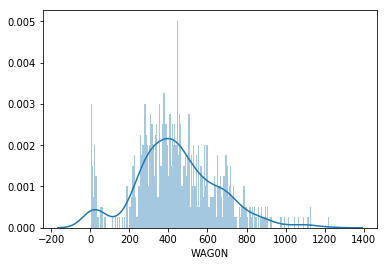

In [7]:
# Distribution of Wagon
wagon_dist = sns.distplot(df['WAG0N'].dropna(),bins=200)
plt.show()

As shown above, a number of dealerships reported Wagon Sales below 80 units. Isolating data corresponding to these values may yield an explanation for the unusually low sales of this model.

In [8]:
# Drop Outliers from WAG0N
df = df[df['WAG0N']>75]

### 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
For the purposes of clustering, we will include the `HATCH`, `SEDAN`, `WAG0N` and `UTE` variables.
These variables measure the number of sales of a particular model of vehicle made by particular a car dealership (signified by `LOCATION_NUMBER` or `DEALER_CODE`).

The variables `LOCATION_NUMBER` and `DEALER_CODE` will not be included in the analysis, as unique variables do not contribute to clustering models. Additionally, `REPORT_DATE` will not be included in the analysis as it contains the same value for all observations. Finally, `K_SALES_TOT` will also be discluded from the Dataset, as the derrived value is not useful for our analysis.

In [9]:
df2 = df[['UTE','HATCH','WAG0N','SEDAN']].dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 674
Data columns (total 4 columns):
UTE      612 non-null float64
HATCH    612 non-null float64
WAG0N    612 non-null float64
SEDAN    612 non-null float64
dtypes: float64(4)
memory usage: 23.9 KB


### 3. Identify a car model that is underperforming in sales. Based on your reporting, the company does not want to focus thir efforts on this car model anymore and has decided to drop it from manufacturing. Now onwards, the selected car product should not be part of analysis
By plotting the distributions of each model of car, it is possible to identify how car sales are distributed among dealerships.

Below are the sales distributions of each car model.

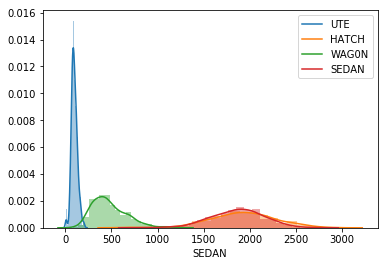

In [10]:
# Distribution of all Models
comb_dist = sns.distplot(df2['UTE'].dropna(),kde_kws={"label":"UTE"})
comb_dist = sns.distplot(df2['HATCH'].dropna(),kde_kws={"label":"HATCH"})
comb_dist = sns.distplot(df2['WAG0N'].dropna(),kde_kws={"label":"WAG0N"})
comb_dist = sns.distplot(df2['SEDAN'].dropna(),kde_kws={"label":"SEDAN"})
plt.show()

As shown above, the `UTE` model has the poorest performance among vehicle models, with the majority of dealerships selling fewer than 100 models over the sales period.

Due to this, the `UTE` model will be removed from the analysis as instructed by the brief.

In [11]:
df2.drop(['UTE'],axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 674
Data columns (total 3 columns):
HATCH    612 non-null float64
WAG0N    612 non-null float64
SEDAN    612 non-null float64
dtypes: float64(3)
memory usage: 19.1 KB


## Task 2. The First Clustering Model
### 1. Build a default clustering model with K = 3
Using the data prepaired in the previous section, a cluster can be generated to compare the sales of 2 models of vehicle.

As KMeans clustering is based on euclidean distance from the mean, the input variables must be scaled to ensure weighting is consistant across values.

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# convert the dataset into a matrix
X = df2.as_matrix()

# scale the variables
# s = StandardScaler()
# X = s.fit_transform(X)

# random state variable
rs = 42

# set the random state for the model
model = KMeans(n_clusters=3, random_state=rs).fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid Locations:")
for c in model.cluster_centers_:
    print(c)

Sum of intra-cluster distance: 62107739.47877447
Centroid Locations:
[1500.10778443  634.43712575 2048.30538922]
[2315.38829787  405.71276596 1586.81382979]
[1923.57976654  423.17120623 1956.6770428 ]


In [13]:
# assign cluster to each record in X
y = model.predict(X)

df2['Cluster_ID'] = y

# print the number of members for each cluster
print("Distribution of Cluster Members")
print(df2['Cluster_ID'].value_counts())

Distribution of Cluster Members
2    257
1    188
0    167
Name: Cluster_ID, dtype: int64


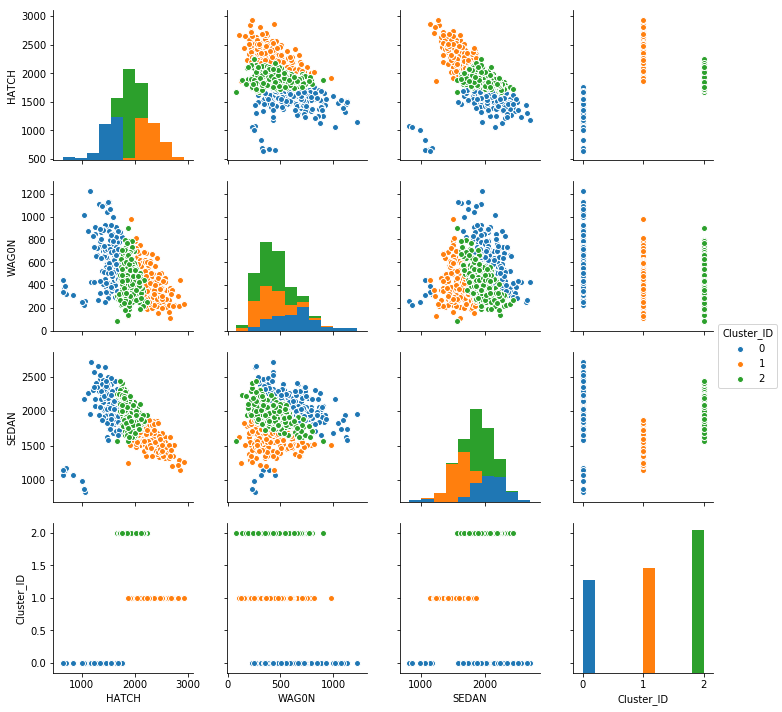

In [14]:
# Generate Pairplot for clusters
cluster = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

Distribution for cluster 0


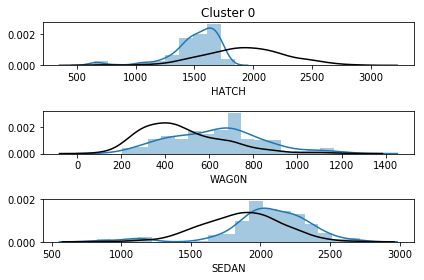

Distribution for cluster 1


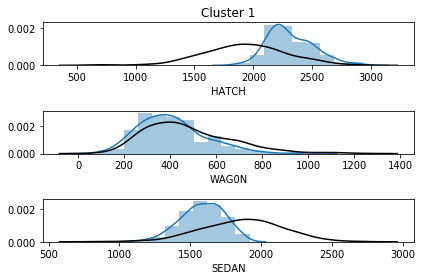

Distribution for cluster 2


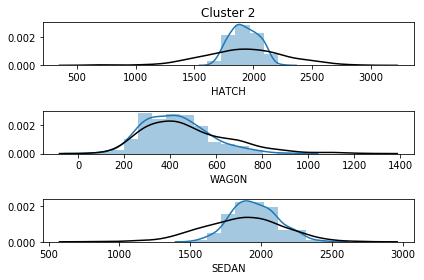

In [15]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['HATCH', 'WAG0N', 'SEDAN']
n_bins = 20

# inspecting all clusters
clusters_to_inspect = [0,1,2]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=3)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

Cluster 0 primarily sells Sedans, with their next highest model being Hatchs.

Cluster 1 primarily sells mostly Hatch's, with about equal sales of Sedans and Wagons.

Cluster 2 primarily sells Wagons and Sedans.

In [16]:
# scale the variables
s = StandardScaler()
X = s.fit_transform(X)

# set the random state for the model
model = KMeans(n_clusters=3, random_state=rs).fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid Locations:")
for c in model.cluster_centers_:
    print(c)

Sum of intra-cluster distance: 818.1870302851785
Centroid Locations:
[-0.3478678  -0.47269896  0.84814697]
[ 0.91645842 -0.44107126 -0.8372986 ]
[-0.85527722  1.27837251  0.06332008]


In [17]:
# assign cluster to each record in X
y = model.predict(X)

df2['Cluster_ID'] = y

# print the number of members for each cluster
print("Distribution of Cluster Members")
print(df2['Cluster_ID'].value_counts())

Distribution of Cluster Members
1    233
0    218
2    161
Name: Cluster_ID, dtype: int64


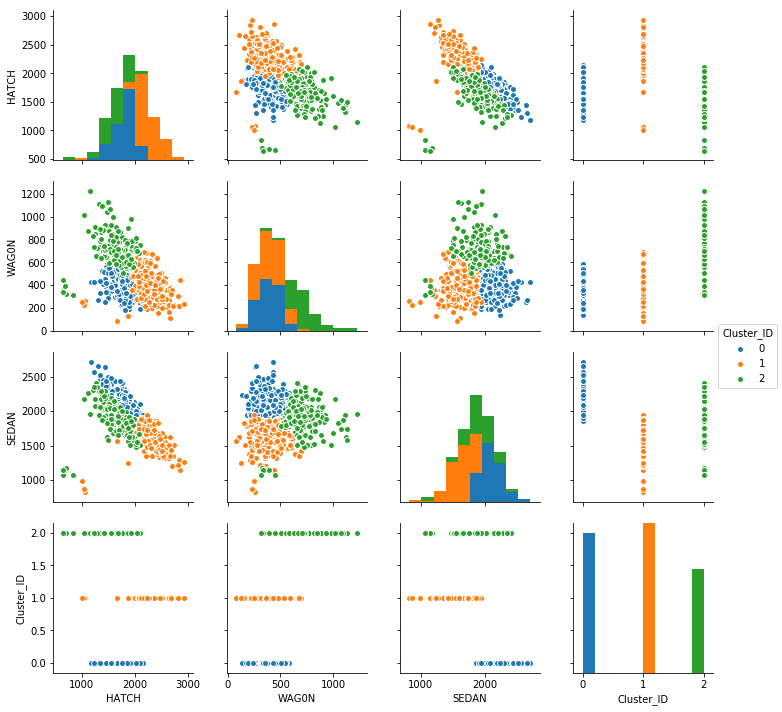

In [18]:
# Generate Pairplot for clusters
cluster = sns.pairplot(df2, hue='Cluster_ID')
plt.show()


#### a. How many records are assigned into each cluster?
#### b. Plot the cluster distribution using pairplot. Explain key characteristics of each culuster/segment

Distribution for cluster 0


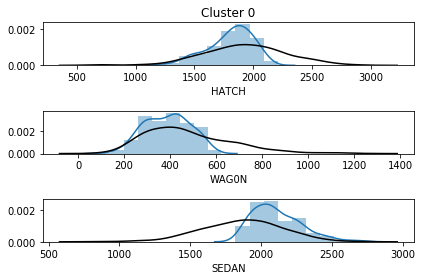

Distribution for cluster 1


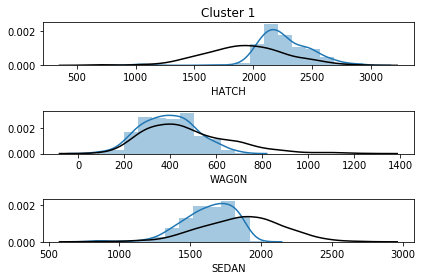

Distribution for cluster 2


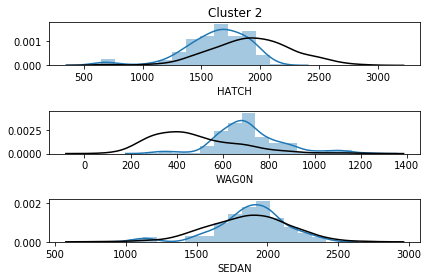

In [19]:
# inspecting all clusters
clusters_to_inspect = [0,1,2]

for cluster in [0,1,2]:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=3)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

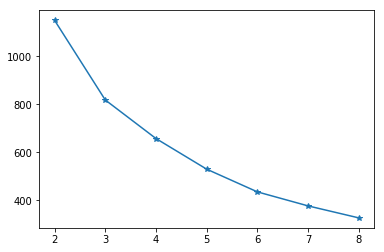

In [20]:
# Lists for clusters and costs
clusters = []
inertia_vals = []

# calculate inertia for k
for k in range (2 ,9 , 1):
    # train with the current K value
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    # append model to lits
    clusters.append(model)
    inertia_vals.append(model.inertia_)
    
# Plot the outpt of inertai vs the value of K
plt.plot(range(2,9,1), inertia_vals, marker='*')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score

print(clusters[2])
print("Silhouette Score for K=4", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette Score for K=5", silhouette_score(X, clusters[3].predict(X)))

print(clusters[4])
print("Silhouette Score for K=6", silhouette_score(X, clusters[4].predict(X)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette Score for K=4 0.37622790637729936
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette Score for K=5 0.3364418751028405
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette Score for K=6 0.3310110159633261


Sum of intra-cluster distance: 657.3240092954184
Centroid Locations:
[ 0.9608289  -0.43070542 -0.80380197]
[-0.75769684  1.34077009  0.17830522]
[-0.34178609 -0.48237524  0.84544755]
[-3.13404974 -0.80506732 -2.8595708 ]
Distribution of Cluster Members
0    230
2    216
1    157
3      9
Name: Cluster_ID, dtype: int64


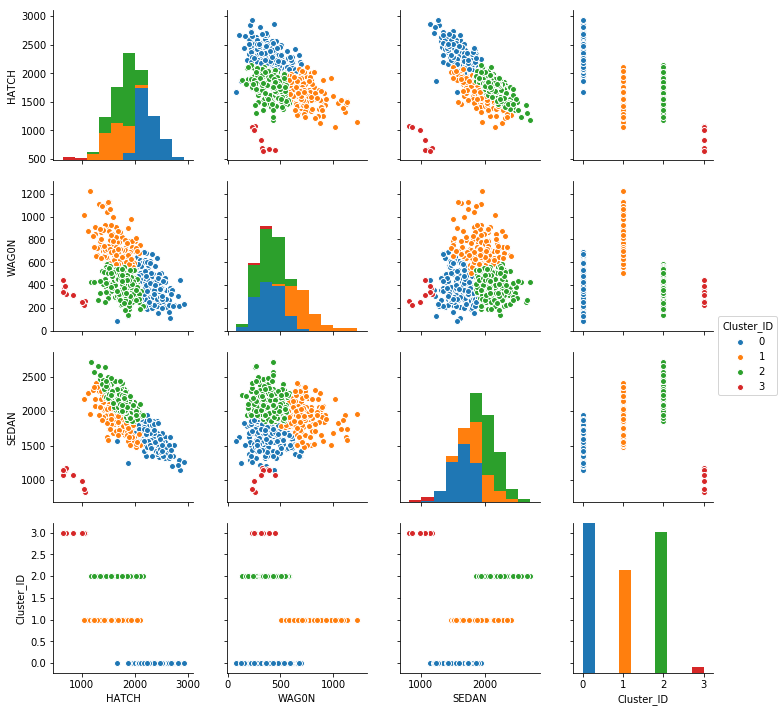

In [22]:
# set the random state for the model
model = KMeans(n_clusters=4, random_state=rs).fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid Locations:")
for c in model.cluster_centers_:
    print(c)
    
# assign cluster to each record in X
y = model.predict(X)

df2['Cluster_ID'] = y

# print the number of members for each cluster
print("Distribution of Cluster Members")
print(df2['Cluster_ID'].value_counts())

# Generate Pairplot for clusters
cluster = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

- Cluster 0 Consists primarily of Sedans with Hatchs being the next most sold model
- Cluster 1 comprises the majority of the dataset. Contains mostly Hatchs with an equal distribution of Wagons and Sedans
- Cluster 2 Consists of Mostly Sedans and Wagons with some Hatchs
- Cluster 3 Consists of equal distributions of Hatch and Sedans with fewer Wagons

Distribution for cluster 0


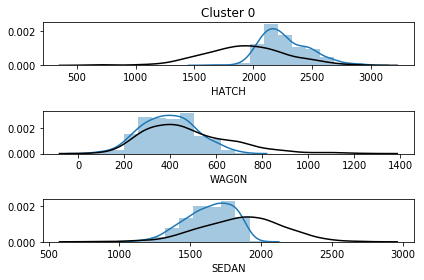

Distribution for cluster 1


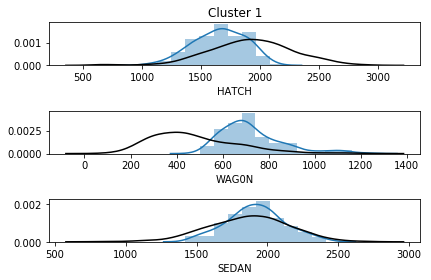

Distribution for cluster 2


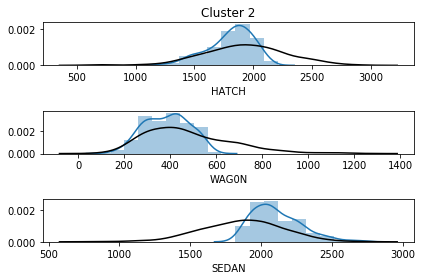

Distribution for cluster 3


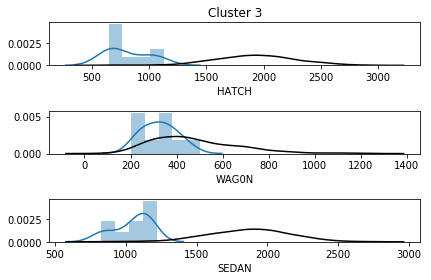

In [23]:
for cluster in [0,1,2,3]:
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=3)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

---
## Part 2: Association Mining and it's data Pre-processing<a name="association"></a>

### 1. Can you identify data quality issues in this dataset for performing association mining?


In [75]:
import pandas as pd

# load the transaction dataset
df = pd.read_csv('Casestudy2-Data-Py/pos_transactions.csv')

# info and the first 10 transactions
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459258 entries, 0 to 459257
Data columns (total 5 columns):
Location           459258 non-null int64
Transaction_Id     459258 non-null int64
Transactin_Date    459258 non-null object
Product_Name       459258 non-null object
Quantity           459258 non-null int64
dtypes: int64(3), object(2)
memory usage: 17.5+ MB
None
   Location  Transaction_Id Transactin_Date    Product_Name  Quantity
0         2           12359      2012-10-23       Candy Bar         1
1         9           12362      2012-10-23   Pain Reliever         1
2         9           12362      2012-10-23   Pain Reliever         1
3         5           12365      2012-10-23      Toothpaste         1
4         2           12371      2012-10-23             Bow         1
5         6           12380      2012-10-23  Greeting Cards         1
6         1           12383      2012-10-23   Pain Reliever         1
7         1           12383      2012-10-23   Pain Reliever        

From the first 10 transaction shown above, we can easily see that there are duplicated transactions in the dataset.
That can be seen clearly by grouping the data (see the result below)

In [38]:
df.groupby(df.columns.tolist(),as_index=False).size().sort_values(ascending = False).reset_index().rename(columns={0: 'Frequency'})

,Location,Transaction_Id,Transactin_Date,Product_Name,Quantity,Frequency
0,1,816536,2012-10-27,Magazine,1,135
1,6,79610,2012-10-24,Toothpaste,1,96
2,7,1143932,2012-10-29,Greeting Cards,1,95
3,8,205484,2012-10-24,Pain Reliever,1,83
4,8,34322,2012-10-23,Candy Bar,1,78
5,6,1014407,2012-10-28,Bow,1,75
6,10,427835,2012-10-26,Magazine,1,73
7,6,362087,2012-10-25,Candy Bar,1,72
8,7,205490,2012-10-24,Bow,1,72
9,1,1068674,2012-10-28,Magazine,1,71


The 'Frequency' column in the result above indicates the number of duplicated transactions for each unique transaction in the dataset. Therefore, we will drop those duplicated transactions except for the first occurence. Hence the number of transactions will be decreased that help the apriori algorithm (in the question 3)run faster 

In [39]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

As were are looking to generate association rules from items purchased by each transaction, we need to group our Transaction_Id and then generate a list of all items purchased.

In [76]:
# group by Transaction_Id, then list all items
transactions = df.groupby(['Transaction_Id'])['Product_Name'].apply(list)

print(transactions.head(10))

Transaction_Id
12359                                  [Candy Bar]
12362               [Pain Reliever, Pain Reliever]
12365                                 [Toothpaste]
12371                                        [Bow]
12380                             [Greeting Cards]
12383               [Pain Reliever, Pain Reliever]
12386               [Pain Reliever, Pain Reliever]
12392                          [Shampoo, Magazine]
12401    [Candy Bar, Candy Bar, Pencils, Magazine]
12404                                  [Candy Bar]
Name: Product_Name, dtype: object


### 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
Association mining usually consists of two variables: a transaction ID and an item. Due to the main target which is to find out the associations between items purchased from the health and beauty aids department and the stationary department, the Product_Name should be chosen as the target variable and the Transaction_ID is chosen as ID. In summary, the variables included in the analysis as the below table.

<table>
    <tr>
        <th>Variable Name</th>
        <th>Role</th>
        <th>Measurement Level</th>
    </tr>
    <tr>
        <td>Product_Name</td>
        <td>Target</td>
        <td>Nominal</td>
    </tr>
    <tr>
        <td>Transaction_Id</td>
        <td>ID</td>
        <td>Nominal</td>
    </tr>
</table>

### 3. Conduct association mining and answer the following:
#### a. What is the highest lift value for the resulting rules? Which rule has this value?

Once the transactions table contains all items purchased in each transaction, we will run the apyori model with the pre-processed transactions and min_support of 0.01. This min support is chosen because the number of rules decreases when the min support increases (see the table below) 
<table>
    <tr>
        <th>Min Support</th>
        <th>Number of rules</th>
    </tr>
    <tr>
        <td>0.01</td>
        <td>72</td>
    </tr>
    <tr>
        <td>0.02</td>
        <td>38</td>
    </tr>
    <tr>
        <td>0.03</td>
        <td>29</td>
    </tr>
</table>

In [77]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.01))

# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'Bow'}), support=0.054645, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Bow'}), confidence=0.054645, lift=1.0)]), RelationRecord(items=frozenset({'Candy Bar'}), support=0.171005, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Candy Bar'}), confidence=0.171005, lift=1.0)]), RelationRecord(items=frozenset({'Greeting Cards'}), support=0.146885, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Greeting Cards'}), confidence=0.146885, lift=1.0)]), RelationRecord(items=frozenset({'Magazine'}), support=0.241305, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Magazine'}), confidence=0.241305, lift=1.0)]), RelationRecord(items=frozenset({'Pain Reliever'}), support=0.0267, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pain Reliever'}), confidence=0.0267, lift=1.0)])]


In [78]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

print(len(result_df))
print(result_df.head(20))

72
         Left_side      Right_side   Support  Confidence      Lift
0                              Bow  0.054645    0.054645  1.000000
1                        Candy Bar  0.171005    0.171005  1.000000
2                   Greeting Cards  0.146885    0.146885  1.000000
3                         Magazine  0.241305    0.241305  1.000000
4                    Pain Reliever  0.026700    0.026700  1.000000
5                          Pencils  0.134925    0.134925  1.000000
6                             Pens  0.143575    0.143575  1.000000
7                          Perfume  0.089960    0.089960  1.000000
8                   Photo Processi  0.058480    0.058480  1.000000
9                   Prescription M  0.014505    0.014505  1.000000
10                         Shampoo  0.033800    0.033800  1.000000
11                            Soap  0.043025    0.043025  1.000000
12                      Toothbrush  0.067350    0.067350  1.000000
13                      Toothpaste  0.160425    0.160425  1

In order to find out the highest lift value for the resulting rules, we will sort the rules by Lift using the code below:

In [82]:
# sort all acquired rules descending by lift# sort a 
result_df = result_df.sort_values(by='Lift', ascending=False)
print(len(result_df))
print(result_df.head(20))


72
                    Left_side      Right_side   Support  Confidence      Lift
49                    Perfume      Toothbrush  0.021820    0.242552  3.601370
50                 Toothbrush         Perfume  0.021820    0.323979  3.601370
15                        Bow      Toothbrush  0.011340    0.207521  3.081236
16                 Toothbrush             Bow  0.011340    0.168374  3.081236
52         Candy Bar,Magazine  Greeting Cards  0.016665    0.411126  2.798966
65         Toothpaste,Pencils       Candy Bar  0.011390    0.463762  2.711980
53    Magazine,Greeting Cards       Candy Bar  0.016665    0.458649  2.682078
71        Toothpaste,Magazine  Greeting Cards  0.011945    0.377230  2.568202
62        Toothpaste,Magazine       Candy Bar  0.013720    0.433286  2.533762
56  Toothpaste,Greeting Cards       Candy Bar  0.013175    0.410692  2.401637
68           Pencils,Magazine  Greeting Cards  0.010955    0.346348  2.357956
55       Toothpaste,Candy Bar  Greeting Cards  0.013175    0.

From the result above, the highest lift value is 3.60
There are two rules having this value: Perfume -> Toothbrush and Toothbrush -> Perfume

#### b. What is the highest confidence value for the resulting rules? Which rule has this value?

In order to find out the highest confidence value for the resulting rules, we will sort the rules by Confidence using the code below:

In [80]:
# sort all acquired rules descending by Confidence# sort a 
result_df = result_df.sort_values(by='Confidence', ascending=False)
print(result_df.head(20))

                    Left_side      Right_side   Support  Confidence      Lift
65         Toothpaste,Pencils       Candy Bar  0.011390    0.463762  2.711980
53    Magazine,Greeting Cards       Candy Bar  0.016665    0.458649  2.682078
62        Toothpaste,Magazine       Candy Bar  0.013720    0.433286  2.533762
52         Candy Bar,Magazine  Greeting Cards  0.016665    0.411126  2.798966
56  Toothpaste,Greeting Cards       Candy Bar  0.013175    0.410692  2.401637
51   Candy Bar,Greeting Cards        Magazine  0.016665    0.381699  1.581813
59           Pencils,Magazine       Candy Bar  0.012005    0.379545  2.219495
71        Toothpaste,Magazine  Greeting Cards  0.011945    0.377230  2.568202
67     Pencils,Greeting Cards        Magazine  0.010955    0.374658  1.552633
70  Toothpaste,Greeting Cards        Magazine  0.011945    0.372350  1.543069
58          Pencils,Candy Bar        Magazine  0.012005    0.363623  1.506900
68           Pencils,Magazine  Greeting Cards  0.010955    0.346

From the result above, the highest confidence value is 46.37%.
The rule has this value is Magazie & Greeding Cards -> Candy Bar  

#### c. Plot the confidence, lift, support of the resulting rules? Interpret them to discuss the rule-set obtained

In [81]:
support = result_df['Support'].as_matrix()
confidence = result_df['Confidence'].as_matrix()
lift = result_df['Lift'].as_matrix()
lift

array([2.71198044, 2.68207763, 2.53376195, 2.79896645, 2.4016375 ,
       1.58181346, 2.21949496, 2.5682022 , 1.55263257, 1.54306945,
       1.50690038, 2.35795625, 2.15050459, 1.42929874, 2.10985149,
       2.25480193, 2.04922168, 3.60136964, 1.8810262 , 2.23457425,
       1.73819091, 2.19502545, 2.12210329, 1.16606887, 1.73819091,
       1.45005315, 1.02513579, 1.43090258, 3.60136964, 1.        ,
       0.98232466, 0.97149472, 1.45005315, 1.36139723, 1.47539224,
       3.08123643, 1.36139723, 1.47539224, 0.81797706, 0.81067486,
       1.43090258, 0.79188134, 1.13465515, 1.        , 3.08123643,
       0.98232466, 1.        , 1.13465515, 1.02513579, 0.61047126,
       1.        , 1.        , 1.        , 0.81797706, 0.97149472,
       1.        , 0.61047126, 0.4995511 , 0.44783534, 0.4995511 ,
       0.79188134, 1.16606887, 1.        , 0.44783534, 1.        ,
       1.        , 0.81067486, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

### 4. The store is particularly interested in products that individuals purchase when they buy “Pens”.
#### a. How many rules are in the subset?

In [54]:
result_df.loc[result_df['Left_side'] == 'Pens']

,Left_side,Right_side,Support,Confidence,Lift
36,Pens,Magazine,0.021150,0.147310,0.610471
24,Pens,Candy Bar,0.012265,0.085426,0.499551
47,Pens,Toothpaste,0.010315,0.071844,0.447835


There is 3 rules are in the subset

#### b. Based on the rules, what are the other products these individuals are most likely to purchase?

In [46]:
pensDf = result_df[result_df['Left_side'] == 'Pens']
otherProducts = pensDf.groupby(['Left_side'])['Right_side'].apply(list)
otherProducts.tolist()

[['Magazine']]

The other products these individuals are most like ly to purchase are Magazine, Candy Bar, Toothpaste

### 5. How the outcome of this study can be used by decision makers?

In [ ]:
                    Left_side      Right_side   Support  Confidence      Lift
65         Toothpaste,Pencils       Candy Bar  0.011390    0.463762  2.711980
53    Magazine,Greeting Cards       Candy Bar  0.016665    0.458649  2.682078
62        Toothpaste,Magazine       Candy Bar  0.013720    0.433286  2.533762
52         Candy Bar,Magazine  Greeting Cards  0.016665    0.411126  2.798966
56  Toothpaste,Greeting Cards       Candy Bar  0.013175    0.410692  2.401637
51   Candy Bar,Greeting Cards        Magazine  0.016665    0.381699  1.581813
59           Pencils,Magazine       Candy Bar  0.012005    0.379545  2.219495
71        Toothpaste,Magazine  Greeting Cards  0.011945    0.377230  2.568202
67     Pencils,Greeting Cards        Magazine  0.010955    0.374658  1.552633
70  Toothpaste,Greeting Cards        Magazine  0.011945    0.372350  1.543069
58          Pencils,Candy Bar        Magazine  0.012005    0.363623  1.506900
68           Pencils,Magazine  Greeting Cards  0.010955    0.346348  2.357956
63          Pencils,Candy Bar      Toothpaste  0.011390    0.344995  2.150505
61       Toothpaste,Candy Bar        Magazine  0.013720    0.344897  1.429299
60         Candy Bar,Magazine      Toothpaste  0.013720    0.338473  2.109851
55       Toothpaste,Candy Bar  Greeting Cards  0.013175    0.331197  2.254802
69    Magazine,Greeting Cards      Toothpaste  0.011945    0.328746  2.049222
50                 Toothbrush         Perfume  0.021820    0.323979  3.601370
54   Candy Bar,Greeting Cards      Toothpaste  0.013175    0.301764  1.881026
66    Magazine,Greeting Cards         Pencils  0.010955    0.301500  2.234574

Based on the interest of the sore in determining the associations between items purchased from the health and beauty aids department and the stationary deparment, it should be benefit to consider the folowwing rules:

Toothpaste,Pencils  =>  Candy Bar

Magazine,Greeting Cards  =>  Candy Bar

Toothpaste,Magazine  =>  Candy Bar

Candy Bar,Magazine  =>  Greeting Cards

Candy Bar,Greeting Cards  =>  Magazine

Toothpaste,Greeting Cards  =>  Candy Bar

Pencils,Candy Bar  =>  Magazine

Pencils,Magazine  =>  Greeting Cards

Candy Bar,Magazine  =>  Toothpaste

Magazine,Greeting Cards  =>  Pencils

Toothbrush  =>  Perfume

The decision makers can use the rules extracted from this association mining to obtain the understainding of consumers' needs and behaviours. Based on these rules, several marketing strategies can be made, for example:

- The association rules can tell decision makers that there are several items that are often bought together. Therefore, promoting the items together can help increase the revenue. For example, promoting the combination of Candy Bar & Greeting Cards, Toothpase & Pencils, etc. 
- These rules can also be used to structure supermarket layout. For example, putting Gretting Cards on the shelves next to the Candy Bar shelves
- Based on the outcome of association mining, the purchasing pattern can be derrived. From there, customer segments can be identified
- Additionally, the outcome can be used to design catologies for the supermarket

---
## Part 3: Text Mining<a name="text"></a>

### 1.	What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.

### 2.	Can you identify data quality issues in order to perform text mining?

### 3. Based on the ZIPF plot, list the top 10 terms that will be least useful for clustering purpose.

### 4. Did you disregard any frequent terms? Justify their selection.

### 5. Justify the term weighting option selected.

### 6. What is the number of input features available to execute clustering? (For information: Note how the original text data is now converted into a feature set that can be mined for knowledge discovery?)

### 7. State how many clusters are generated? Name each cluster meaningfully according to the terms that appear in the clusters?

### 8.	Identify the first fifteen high frequent terms (that are not stop words or noise) in the start list?

### 9. Describe how these clusters can be useful in the online personalised news story service planned.

---
## Part 4: Web Mining<a name="web"></a>





In [7]:
import pandas as pd
df = pd.read_csv('Casestudy2-Data-Py/web_log_data.csv')
df.head(10)

,ip,date_time,request,step,session,user_id
0,c210-49-32-6.rochd2.,18/Apr/2005:21:25:07,/,1,3,3
1,visp.inabox.telstra.,19/Apr/2005:08:24:28,/,1,12,12
2,dsl-61-95-54-84.requ,19/Apr/2005:08:33:01,/,1,13,13
3,d220-236-91-52.dsl.n,19/Apr/2005:09:16:06,/,1,15,15
4,allptrs.eq.edu.au,19/Apr/2005:09:47:54,/,1,22,22
5,cpe-144-136-135-38.q,19/Apr/2005:10:13:37,/,1,23,23
6,225-145-222-203.rev.,19/Apr/2005:11:48:32,/,1,25,25
7,cpe-138-130-198-54.q,19/Apr/2005:12:31:54,/,1,26,26
8,203-219-44-170-qld.t,19/Apr/2005:12:33:49,/,1,29,29
9,cpe-138-130-198-54.q,19/Apr/2005:12:42:51,/,1,30,30


In [8]:
def strip_ending_slash(doc):
    request_string = doc['request']
    request_string = request_string.strip('/')
    request_string = '/' + request_string
    doc['request'] = request_string
    return doc

In [9]:
df = df.apply(strip_ending_slash, axis=1)
print(len(df))

5866


In [10]:
df = df[['request', 'user_id', 'step']]
df = df.sort_values(by=['step'])

In [11]:
df = df.groupby(['user_id'])['request'].apply(list)
df.head(10)

user_id
1                                         [/robots.txt]
2                         [/code/Global/code/menu.html]
3     [/, /favicon.ico, /services.html, /more.html, ...
4                                         [/robots.txt]
5                            [/code/Ultra/services.htm]
6     [/richlands, /richlands, /richlands/javascript...
7     [/robots.txt, /richlands/contact, /richlands/s...
8                                         [/robots.txt]
9                        [/code/Global/code/oform.html]
10    [/cgi-bin/FormMail.pl, /richlands/fileupload/u...
Name: request, dtype: object

In [12]:
sequences = df.values.tolist()

# show the first 5 sequences
print(sequences[:5])

[['/robots.txt'], ['/code/Global/code/menu.html'], ['/', '/favicon.ico', '/services.html', '/more.html', '/guarantee.html'], ['/robots.txt'], ['/code/Ultra/services.htm']]


In [13]:
from collections import defaultdict
import subprocess
import re

''' Uses SPMF to find association rules in supplied transactions '''
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF
    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth', 'seq_rule_input.txt', 'seq_rule_output.txt', '10%', '10%'], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

In [14]:
get_association_rules(sequences, 0.1, 0.1)

,Left_rule,Right_rule,Support,Confidence
0,[/],[/services.html],0.100052,0.267586
1,[/eaglefarm],[/eaglefarm/javascript/menu.js],0.109335,0.806084


### 1.	Rationale behind selecting the method

I